LEITURA DOS DADOS

In [47]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
%matplotlib inline

In [48]:
dataset = pd.read_csv('/content/data.csv', sep=",")

In [49]:
dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


ANÁLISE DE DADOS

In [52]:
dataset.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [53]:
#Resumo Estatístico da base
#Somente dados numéricos
dataset.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [54]:
#Lista estilos disponíveis do matplotLib
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='acousticness', ylabel='danceability'>

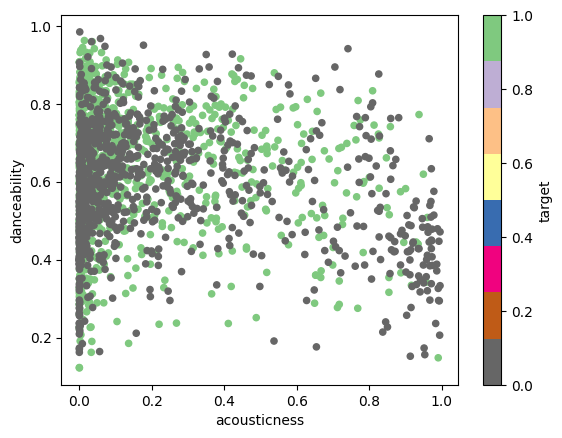

In [55]:
%matplotlib notebook
%matplotlib inline
from matplotlib import style
plt.style.use('seaborn-v0_8-colorblind')
dataset.plot(x='acousticness' , y='danceability', c='target', kind='scatter', colormap='Accent_r')

<ipython-input-10-8b99a98f9bb4>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn-colorblind")


<Axes: xlabel='tempo', ylabel='valence'>

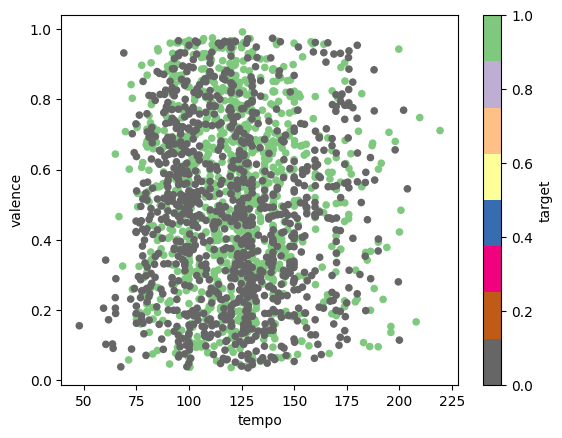

In [ ]:
%matplotlib notebook
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo' , y='valence', c='target', kind='scatter', colormap='Accent_r')

<ipython-input-11-ab592476a045>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn-colorblind")


<Axes: xlabel='tempo', ylabel='speechiness'>

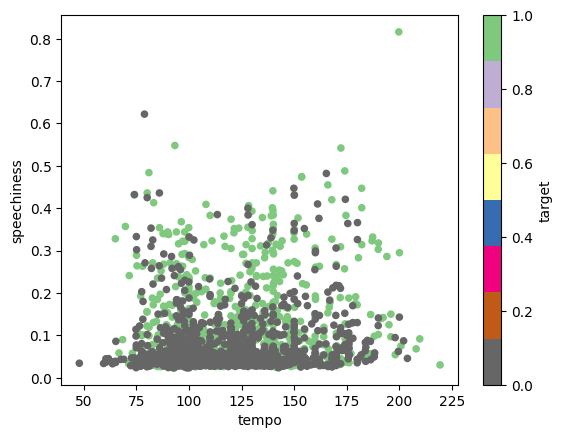

In [ ]:
%matplotlib notebook
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo' , y='speechiness', c='target', kind='scatter', colormap='Accent_r')

<ipython-input-12-dcd570cc5900>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn-colorblind")


<Axes: xlabel='danceability', ylabel='energy'>

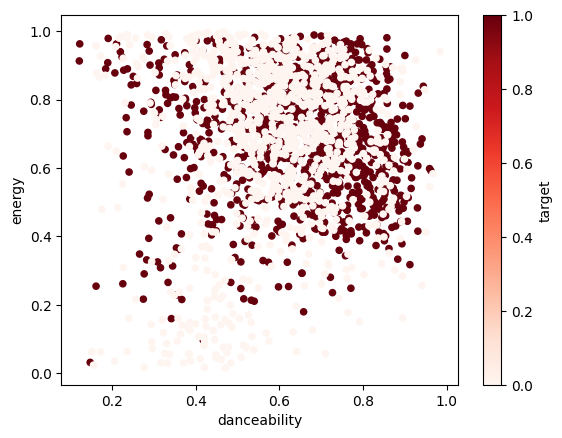

In [ ]:
%matplotlib notebook
%matplotlib inline
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='danceability' , y='energy', c='target', kind='scatter', colormap='Reds')

SEPARAÇÃO DA CLASSE DE DADOS

In [56]:
classes = dataset['target']
dataset.drop('target', axis = 1, inplace=True)

PRÉ PROCESSAMENTO DE DADOS

In [57]:
def remove_features (lista_features):
  for i in lista_features:
    dataset.drop(i, axis=1, inplace=True)
    return 0

In [58]:
#remove features
remove_features(['song_title'])

0

In [59]:
#visualizando o dataset
dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [60]:
#Visalizando o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(1)
memory usage: 236.5+ KB


Label Encoder

In [ ]:
#from sklearn.preprocessing import LabelEncoder

In [ ]:
#enc = LabelEncoder()

In [ ]:
#inteiros = enc.fit_transform(dataset['artist'])

In [ ]:
#Visualizando valores únicos
#set(inteiros)

In [ ]:
#Cria uma coluna chamada 'artist inteiros'
#dataset['artist_inteiros'] = inteiros

In [ ]:
#dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [ ]:
#remove_features(['artist'])

0

In [ ]:
#Visualizando o dataset alterado
#dataset.head(20)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,356
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,356
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,869
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,321
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,516


One hot Encoding

In [ ]:
#Importa o pacote OneHot Encoder
#from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Instancia um objeto do tipo OneHotEncoder
#ohe = OneHotEncoder()

In [ ]:
#ohe

OneHotEncoder()

In [ ]:
#Transforma em array numpy o dataset
#dataset_array = dataset.values

In [ ]:
#Pega o número de linhas
#num_rows = dataset_array.shape[0]

In [ ]:
#Visualiza coluna de inteiros
#dataset_array[:] [:, 14]

array([ 449.,  222.,  449., ...,  947., 1242.,  132.])

In [ ]:
#Transforma a matriz em uma dimensão
#inteiros = inteiros.reshape(len(inteiros), 1)

In [ ]:
#Criar as novas features a partir da matriz de presença
#novas_features = ohe.fit_transform(inteiros)

In [ ]:
#Imprime novas features
#novas_features

<2017x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2017 stored elements in Compressed Sparse Row format>

In [ ]:
#Concatena as novas features ao array
#dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [ ]:
#Visualizando a quantidade de linhas e colunas da base
#dataset_array.shape

(2017, 1358)

In [ ]:
#Transforma em dataframe e visualiza as colunas
#dataf = pd.DataFrame(dataset_array)

In [ ]:
#dataf.head()

,0,1,2,3,4,5,6,7,8,9,...,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357
0,0.0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.6040,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.1800,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pandas Get_dummies

In [61]:
dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [67]:
#Aplicando o get_dummies nos dados
dataset = pd.get_dummies(dataset, columns = ['artist'], prefix = ['artist'])

In [68]:
#Visualização  features geradas
dataset.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1357)

In [69]:
len(dataset.columns)

1357

In [71]:
#Visualizando as colunas
dataset.dtypes

Unnamed: 0                    int64
acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1357, dtype: object

In [72]:
#checando missing values
dataset.isnull().sum()

Unnamed: 0                  0
acousticness                0
danceability                0
duration_ms                 0
energy                      0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1357, dtype: int64

In [73]:
#coluna artist
dataset.values[:][:, 14]

array([0., 0., 0., ..., 0., 0., 0.])

PIPELINE

In [74]:
#importe as bibliotecas de Pipeline e Pŕe processadores
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [78]:
#Treinando o algoritmo de SVM
#pip_1, dataset_array, classes
clf = svm.SVC().fit(dataset,classes)

In [79]:
clf

SVC()

In [81]:
#Função que retorna a acúracia após fazer uma validação cruzada
def Acuracia (clf, X, y):
  resultados = cross_val_predict(clf, X, y, cv=5)
  return metrics.accuracy_score(y, resultados)

In [94]:
Acuracia(clf,dataset,classes)

0.5567674764501735

In [95]:
#Criando um pipeline
pip_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC())
])

In [92]:
#Vendo os passos do pipeline
pip_1.steps

[('scaler', StandardScaler()), ('clf', SVC())]

In [93]:
#Chama a função acuracia passando os dados de musicas e classes
#usando o pipeline pip_1

Acuracia(pip_1, dataset, classes)

0.8274665344571145

In [88]:
#Criando vários Pipelines
pip_2 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC())
])

pip_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel = 'rbf'))

])

pip_4 = Pipeline([
     ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel = 'poly'))
])

pip_5 = Pipeline([
     ('scaler', StandardScaler()),
    ('clf', svm.SVC(kernel = 'linear'))
])

In [89]:
#Chama a função acuracia passando os dados de musicas e as classes
Acuracia(pip_2, dataset, classes)

0.9062964799206743

TESTANDO O DESEMPENHO DOS KERNELS

In [ ]:
Acuracia(pip_3, dataset, classes)

In [ ]:
Acuracia(pip_4, dataset, classes)

In [ ]:
Acuracia(pip_5, dataset, classes)

TESTE COM APENAS LABEL ENCODER NOS DADOS

In [ ]:
#teste com apenas LabelEncoder na coluna 'artist'
